In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
def print_heatmap(index_variable,columns_variable,file):
    data_frame = pd.read_csv(file)
    data_frame[index_variable] = data_frame[index_variable].fillna("None")
    data_frame[columns_variable] = data_frame[columns_variable].fillna("None")

    heatmap_data = data_frame.pivot_table(
        index = index_variable,
        columns = columns_variable,
        values = 'mean_test_score',
        aggfunc = 'mean'
    )

    plt.figure()
    sns.heatmap(heatmap_data,annot=True,cmap="viridis")
    plt.xlabel(columns_variable)
    plt.ylabel(index_variable)
    plt.tight_layout()
    plt.show()

In [47]:
def print_best_parameters(file,print_parameters):
    data_frame = pd.read_csv(file)
    best_rows = data_frame.sort_values(by='mean_test_score',ascending=False).head(3)
    print("Best parameter combinations and scores")
    print(best_rows[print_parameters])

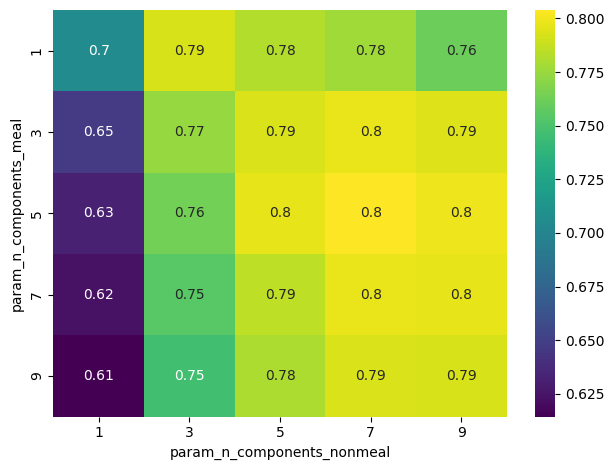

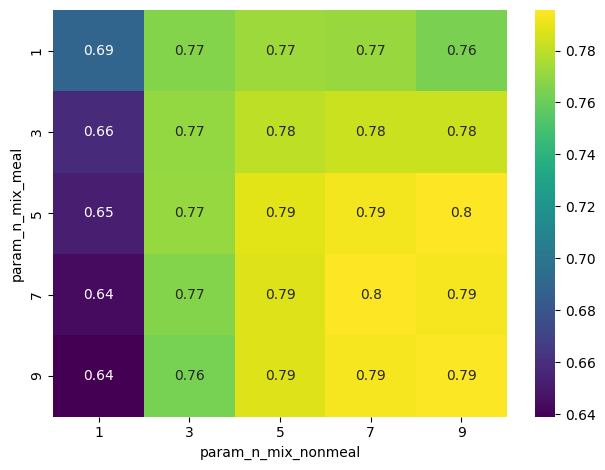

Best parameter combinations and scores
     param_n_components_meal  param_n_components_nonmeal  param_n_mix_meal  \
44                         1                           3                 7   
218                        3                           7                 7   
472                        7                           7                 9   

     param_n_mix_nonmeal  mean_test_score  
44                     9         0.831248  
218                    7         0.831066  
472                    5         0.830399  


In [48]:
file = 'cv_results_14_features_1.csv'
#file = 'cv_results_23_features.csv'
print_heatmap('param_n_components_meal','param_n_components_nonmeal',file)
print_heatmap('param_n_mix_meal','param_n_mix_nonmeal',file)
print_parameters = ['param_n_components_meal','param_n_components_nonmeal','param_n_mix_meal','param_n_mix_nonmeal','mean_test_score']
print_best_parameters(file,print_parameters)

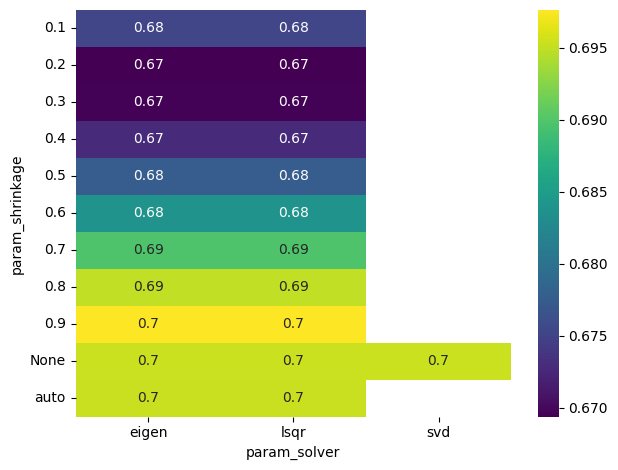

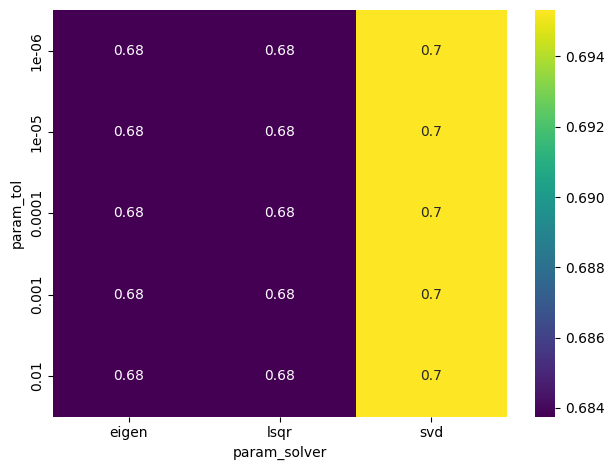

Best parameter combinations and scores
    param_shrinkage param_solver  param_tol  mean_test_score
162             0.9        eigen   0.010000         0.697604
164             0.9        eigen   0.000001         0.697604
163             0.9        eigen   0.000010         0.697604


In [49]:
file = 'cv_results_LDA.csv'
print_heatmap('param_shrinkage','param_solver',file)
print_heatmap('param_tol','param_solver',file)

print_parameters = ['param_shrinkage','param_solver','param_tol','mean_test_score']
print_best_parameters(file,print_parameters)